# Where should a drinks company run promotions?

## 📖 Background
Your company owns a chain of stores across Russia that sell a variety of alcoholic drinks. The company recently ran a wine promotion in Saint Petersburg that was very successful. Due to the cost to the business, it isn’t possible to run the promotion in all regions. The marketing team would like to target 10 other regions that have similar buying habits to Saint Petersburg where they would expect the promotion to be similarly successful.

### The data
The marketing team has sourced you with historical sales volumes per capita for several different drinks types.

- "year" - year (1998-2016)
- "region" - name of a federal subject of Russia. It could be oblast, republic, krai, autonomous okrug, federal city and a single autonomous oblast
- "wine" - sale of wine in litres by year per capita
- "beer" - sale of beer in litres by year per capita
- "vodka" - sale of vodka in litres by year per capita
- "champagne" - sale of champagne in litres by year per capita
- "brandy" - sale of brandy in litres by year per capita

In [1]:
import pandas as pd
df = pd.read_csv(r'./data/russian_alcohol_consumption.csv')
df.head() 

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1615 non-null   int64  
 1   region     1615 non-null   object 
 2   wine       1552 non-null   float64
 3   beer       1557 non-null   float64
 4   vodka      1554 non-null   float64
 5   champagne  1552 non-null   float64
 6   brandy     1549 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 88.4+ KB


#### Missing Values
Let's check for for which regions there are no data of sales.

In [3]:
df.dropna(how='all', subset=['wine', 'beer', 'vodka', 'champagne', 'brandy'])['region'].value_counts()

Yaroslavl Oblast             19
Ivanovo Oblast               19
Chukotka Autonomous Okrug    19
Kostroma Oblast              19
Lipetsk Oblast               19
                             ..
Republic of Adygea           19
Republic of Ingushetia       11
Republic of Crimea            3
Sevastopol                    3
Chechen Republic              3
Name: region, Length: 85, dtype: int64

There are 4 regions with missing data, so they can be not taken for consideration.

In [4]:
df = df[~df['region'].isin(['Republic of Crimea', 'Chechen Republic', 'Sevastopol', 'Republic of Ingushetia'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1539 non-null   int64  
 1   region     1539 non-null   object 
 2   wine       1539 non-null   float64
 3   beer       1539 non-null   float64
 4   vodka      1539 non-null   float64
 5   champagne  1539 non-null   float64
 6   brandy     1539 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 96.2+ KB


In [5]:
print('Summary statistics of numerical columns:')
df.describe()

Summary statistics of numerical columns:


,year,wine,beer,vodka,champagne,brandy
count,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000
mean,2007.000000,5.637544,51.722190,11.902404,1.315172,0.524185
std,5.479006,2.811555,25.115577,5.078808,0.798462,0.399331
min,1998.000000,0.100000,1.000000,0.400000,0.100000,0.000000
25%,2002.000000,3.550000,32.700000,8.400000,0.800000,0.200000
50%,2007.000000,5.400000,50.300000,11.600000,1.200000,0.400000
75%,2012.000000,7.400000,67.500000,15.000000,1.660000,0.700000
max,2016.000000,18.100000,207.300000,40.600000,5.560000,2.300000


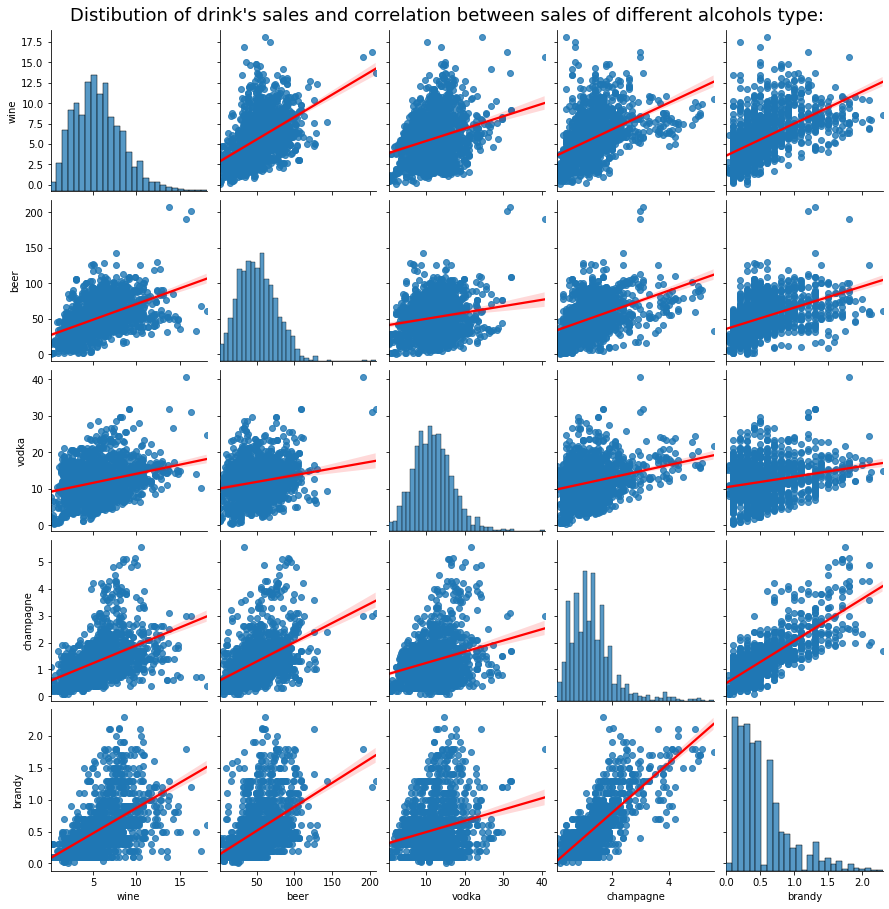

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

alcohols = ['wine', 'beer', 'vodka', 'champagne', 'brandy']
sns.pairplot(df[alcohols], kind='reg', plot_kws={'line_kws':{'color':'red'}});
plt.suptitle('Distibution of drink\'s sales and correlation between sales of different alcohols type:', y=1.01, fontsize=18);

#### Let's compare sales in <b>Saint Petersburg</b> to average sales in each year for all other regions.

In [6]:
df_sp = df[df['region']=='Saint Petersburg']
df_year = df[df['region']!='Saint Petersburg'].groupby('year')[alcohols].mean().reset_index()
df_year['region'] = 'others'
df_year = df_year[df.columns]
df_compare = pd.concat([df_sp, df_year])

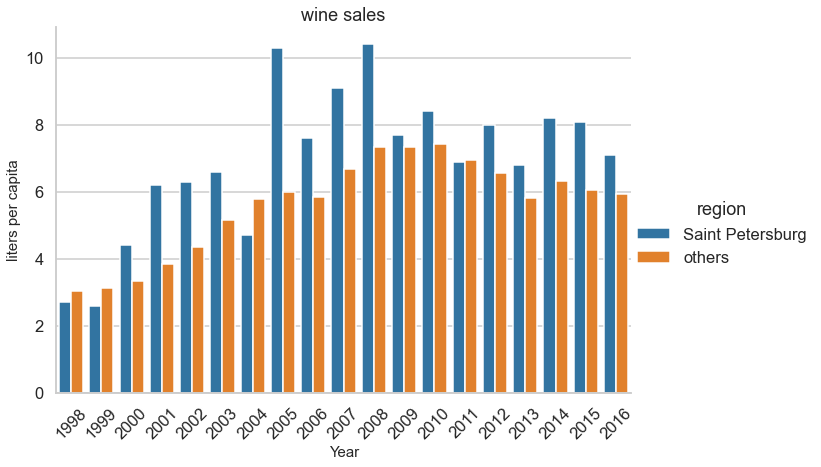

In [7]:
sns.set_style('whitegrid')
sns.set_context('talk')
def barplot(drink):
    sns.catplot(x='year', y=drink, hue='region', data=df_compare, kind='bar', height=6, aspect=1.5);
    plt.xticks(rotation=45);
    plt.ylabel('liters per capita', fontsize=15);
    plt.xlabel('Year', fontsize=15);
    plt.title('{} sales'.format(drink), fontsize=18);
    
barplot('wine')

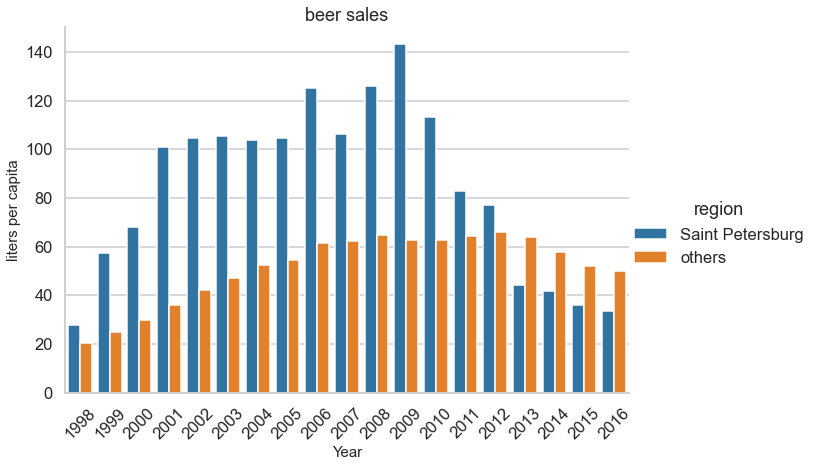

In [8]:
barplot('beer')

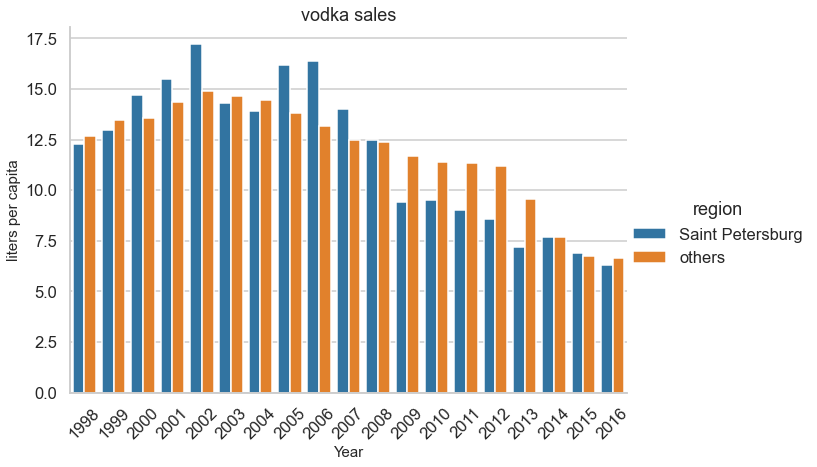

In [9]:
barplot('vodka')

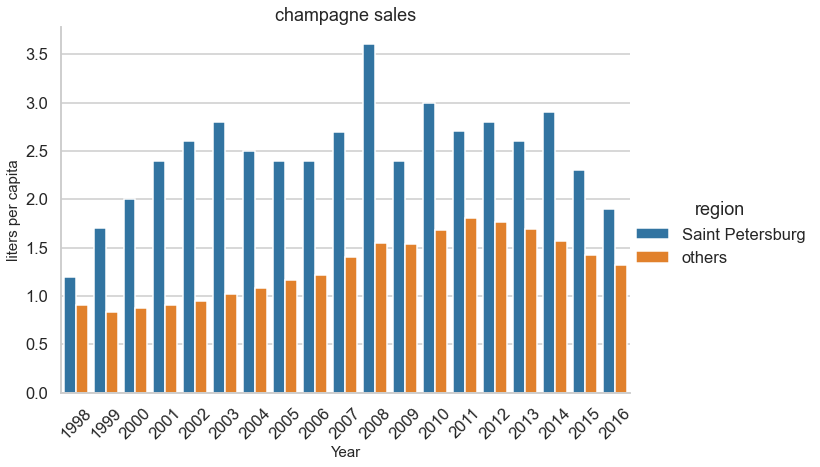

In [10]:
barplot('champagne')

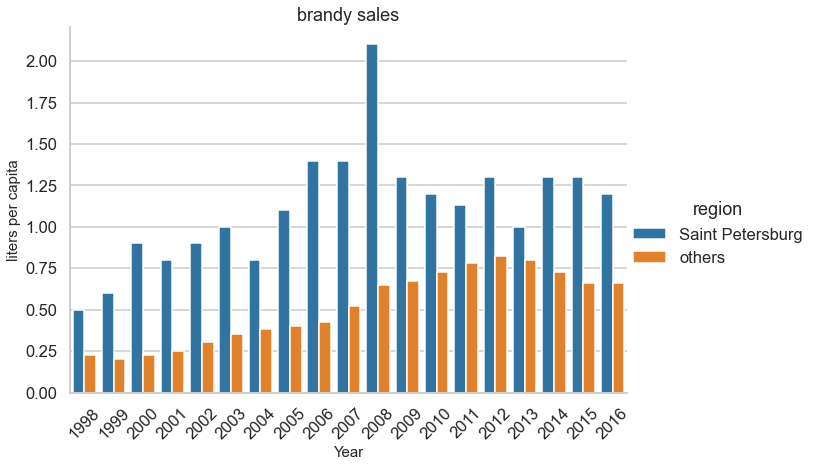

In [11]:
barplot('brandy')

There are differences between sales in Saint Petersburg compared to average sales in other regions.

- Vodka sales are quite similar.
- Wine, champagne and brandy were selling better than avarage for rest of regions.
- Most interesting are beer sales. In general on average they sell better but in last 4 years sales felt down heavily.

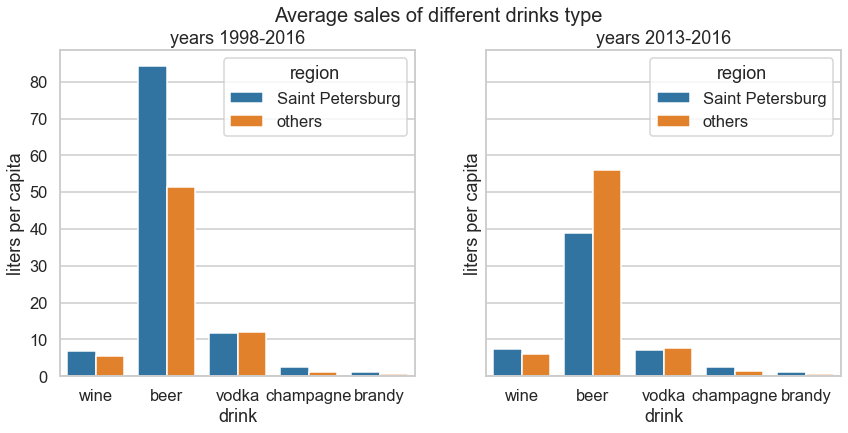

In [12]:
avg_liters = df_compare.groupby('region')[alcohols].mean().reset_index()
avg_liters_melt = avg_liters.melt(id_vars=['region'], var_name='drink', value_name='liters per capita')

avg_liters_4yr = df_compare[df_compare['year']>2012].groupby('region')[alcohols].mean().reset_index()
avg_liters_4yr_melt = avg_liters_4yr.melt(id_vars=['region'], var_name='drink', value_name='liters per capita')

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True);
fig.suptitle('Average sales of different drinks type', fontsize=20);

sns.barplot(ax=axes[0], x='drink', y='liters per capita', hue='region', data=avg_liters_melt);
axes[0].set_title('years 1998-2016');

sns.barplot(ax=axes[1], x='drink', y='liters per capita', hue='region', data=avg_liters_4yr_melt);
axes[1].set_title('years 2013-2016');


#### Knowing this relationship let's look for regions that have higher on average sales of beer, champagne and brandy from overall average as well as lower sales of beer in last 4 years. 

In [13]:
regions = {}

for alc in ['beer', 'champagne', 'brandy']:
    avg = avg_liters[avg_liters['region']=='others'][alc].values[0]
    df_regions = df.groupby('region')[alc].mean().reset_index()
    regions[alc] = list(df_regions[df_regions[alc] > avg]['region'])

avg_4yr = avg_liters_4yr[avg_liters_4yr['region']=='others']['beer'].values[0]
df_regions = df[df['year']>2012].groupby('region')['beer'].mean().reset_index()
regions['beer_4yr'] = list(df_regions[df_regions['beer'] < avg_4yr]['region'])

regions1 = set(regions['beer']).intersection(set(regions['champagne']), set(regions['brandy']), set(regions['beer_4yr']))
regions1

{'Chelyabinsk Oblast',
 'Kaliningrad Oblast',
 'Kaluga Oblast',
 'Leningrad Oblast',
 'Saint Petersburg'}

#### This interpretation gives us 4 regions that should have similar habits of drinks sales to Saint Petersburg.

#### Now let's get closer look into correlation of sales between different drink types, especially wine with other drink.   

In [14]:
alcohol = ['beer', 'vodka', 'champagne', 'brandy']
print('Correlation of sales between wine and other drinks type (all regions)')
df[alcohol].corrwith(df['wine']).sort_values(ascending=False)

Correlation of sales between wine and other drinks type (all regions)


brandy       0.557594
beer         0.492961
champagne    0.467464
vodka        0.275680
dtype: float64

In [15]:
print('Correlation of sales between wine and other drinks type (Saint Petersburg)')
df_sp[alcohol].corrwith(df_sp['wine']).sort_values(ascending=False)

Correlation of sales between wine and other drinks type (Saint Petersburg)


brandy       0.842235
champagne    0.743047
beer         0.415810
vodka       -0.150376
dtype: float64

#### We can see that correlation of sales between wine and brandy as well as champagne is quite high for Saint Petersburg, especially according to correlation for all regions.

#### Having this on mind let's look for regions that also have high correlation between those drinks and similar correlation with beer and vodka.

In [16]:
corr_all = df.groupby('region')[alcohol].corrwith(df['wine']).reset_index()

regions2 = set(list(corr_all[(corr_all['brandy'] > 0.84 - 0.15) & (corr_all['champagne'] > 0.74 - 0.15) & (corr_all['vodka'] < 0) & (corr_all['vodka'] > -0.4) & (corr_all['beer'] < 0.6) & (corr_all['beer'] > 0.3)]['region']))
regions2

{'Arkhangelsk Oblast', 'Kemerovo Oblast', 'Saint Petersburg', 'Tyumen Oblast'}

#### This gives us another 3 regions.

In [17]:
print('List of regions found so far for recommendation: ')
regions1 | regions2

List of regions found so far for recommendation: 


{'Arkhangelsk Oblast',
 'Chelyabinsk Oblast',
 'Kaliningrad Oblast',
 'Kaluga Oblast',
 'Kemerovo Oblast',
 'Leningrad Oblast',
 'Saint Petersburg',
 'Tyumen Oblast'}

### Hierarchical clustering.
#### Now let's use algorithm that groups together the data points with similar characteristics.

In [18]:
# prepering data:
df = df.sort_values(by=['region', 'year'])

df_melt = pd.melt(df, id_vars=['region', 'year'], value_vars=alcohols)
df_pivot = pd.pivot_table(df_melt, index=['region'], columns=['year', 'variable'], values=['value'])
df_pivot.sample(5)

value                                           \
year                      1998                              1999          
variable                  beer brandy champagne vodka wine  beer brandy   
region                                                                    
Moscow Oblast             11.9    0.2       1.1  15.2  2.2  15.8    0.3   
Zabaykalsky Krai           8.6    0.1       0.2   5.0  0.9  11.5    0.1   
Jewish Autonomous Oblast  11.6    0.2       0.5  11.5  2.3  11.5    0.2   
Altai Republic             7.6    0.1       0.5   9.0  3.4   5.1    0.1   
Perm Krai                 19.0    0.2       0.9  16.7  3.2  15.4    0.3   

                                               ...                         \
year                                           ...  2015                    
variable                 champagne vodka wine  ...  beer brandy champagne   
region                                         ...                          
Moscow Oblast                  1.1  15.8  2.3  ...  94.9    1.2       2.3   
Zabaykalsky Krai               0.2   5.8  1.1  ...  31.9    0.3       0.9   
Jewish Autonomous Oblast       0.4  11.4  3.4  ...  59.0    0.4       1.6   
Altai Republic                 0.6   7.9  4.8  ...  40.3    0.3       1.0   
Perm Krai                      1.3  15.8  3.2  ...  47.3    0.8       0.9   

                                                                       
year                                 2016                              
variable                 vodka wine  beer brandy champagne vodka wine  
region                                                                 
Moscow Oblast              9.4  8.3  99.1    1.3       2.2   9.6  8.7  
Zabaykalsky Krai           7.0  6.6  30.8    0.3       0.9   6.8  6.4  
Jewish Autonomous Oblast   8.0  5.4  59.6    0.5       1.6   8.3  5.5  
Altai Republic             7.7  4.3  42.2    0.3       1.0   6.6  4.5  
Perm Krai                  6.9  5.8  51.5    0.7       0.9   7.1  5.5  

[5 rows x 95 columns]

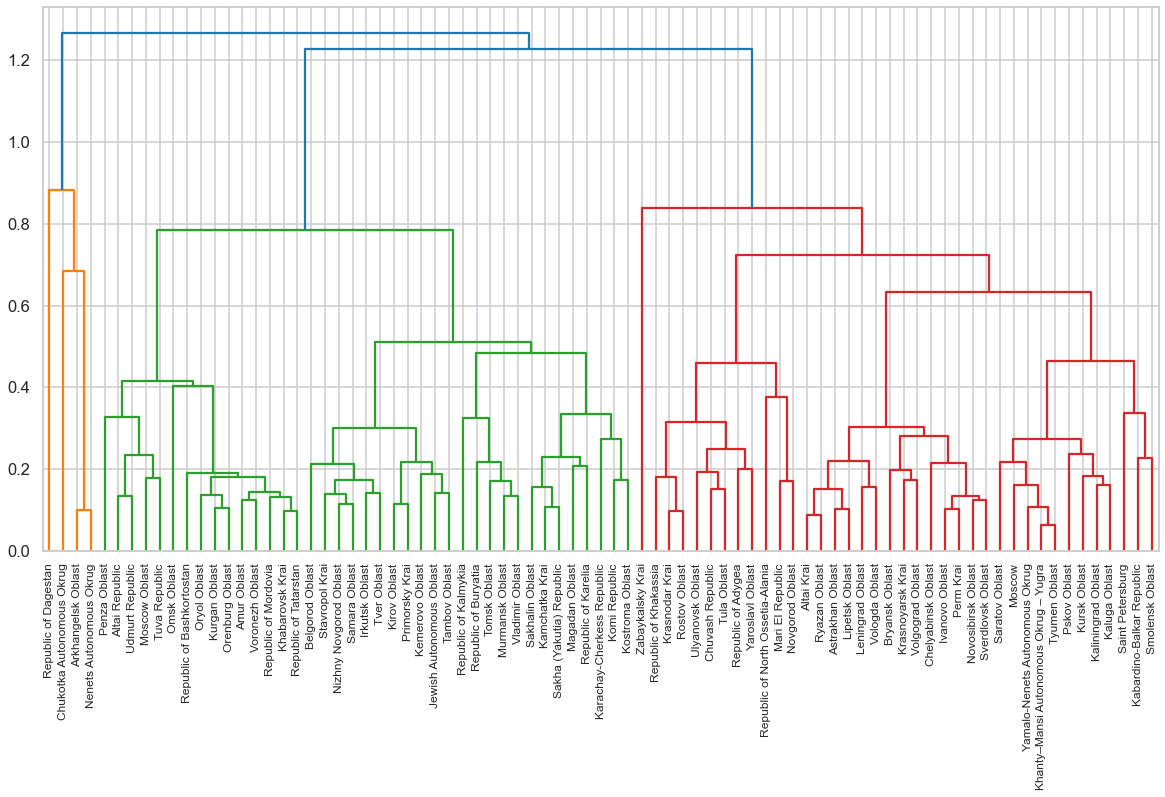

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import normalize

samples = df_pivot.values
region_name = df_pivot.index

samples = normalize(samples) # normalize data

mergings = linkage(samples, method='ward') # hierarchical clustering algorithm
plt.figure(figsize=(20, 10))
# graphical interpretation of clusters:
dendrogram(mergings,
        labels=region_name,
        leaf_rotation=90,
        leaf_font_size=12)
plt.show()

#### Red coloring clusters are the closest regions to Saint Petersburg.

In [20]:
from scipy.cluster.hierarchy import fcluster

labels = fcluster(mergings, 0.65, criterion='distance')

pairs = pd.DataFrame({'labels': labels, 'regions': region_name})

cluster = pairs[pairs['labels']==pairs[pairs['regions']=='Saint Petersburg']['labels'].values[0]]
regions3 = set(list(cluster['regions']))
regions3

{'Altai Krai',
 'Astrakhan Oblast',
 'Bryansk Oblast',
 'Chelyabinsk Oblast',
 'Ivanovo Oblast',
 'Kabardino-Balkar Republic',
 'Kaliningrad Oblast',
 'Kaluga Oblast',
 'Khanty–Mansi Autonomous Okrug – Yugra',
 'Krasnoyarsk Krai',
 'Kursk Oblast',
 'Leningrad Oblast',
 'Lipetsk Oblast',
 'Moscow',
 'Novosibirsk Oblast',
 'Perm Krai',
 'Pskov Oblast',
 'Ryazan Oblast',
 'Saint Petersburg',
 'Saratov Oblast',
 'Smolensk Oblast',
 'Sverdlovsk Oblast',
 'Tyumen Oblast',
 'Volgograd Oblast',
 'Vologda Oblast',
 'Yamalo-Nenets Autonomous Okrug'}

#### Here we have 25 regions that should have similar sales habits to Saint Petersburg.
#### Together it ives us 27 regions (5 of them were already found)

In [21]:
regions3 | regions2 | regions1

{'Altai Krai',
 'Arkhangelsk Oblast',
 'Astrakhan Oblast',
 'Bryansk Oblast',
 'Chelyabinsk Oblast',
 'Ivanovo Oblast',
 'Kabardino-Balkar Republic',
 'Kaliningrad Oblast',
 'Kaluga Oblast',
 'Kemerovo Oblast',
 'Khanty–Mansi Autonomous Okrug – Yugra',
 'Krasnoyarsk Krai',
 'Kursk Oblast',
 'Leningrad Oblast',
 'Lipetsk Oblast',
 'Moscow',
 'Novosibirsk Oblast',
 'Perm Krai',
 'Pskov Oblast',
 'Ryazan Oblast',
 'Saint Petersburg',
 'Saratov Oblast',
 'Smolensk Oblast',
 'Sverdlovsk Oblast',
 'Tyumen Oblast',
 'Volgograd Oblast',
 'Vologda Oblast',
 'Yamalo-Nenets Autonomous Okrug'}

### Let's see how hierarchical clustering will connect regions if consider only wine sales data.

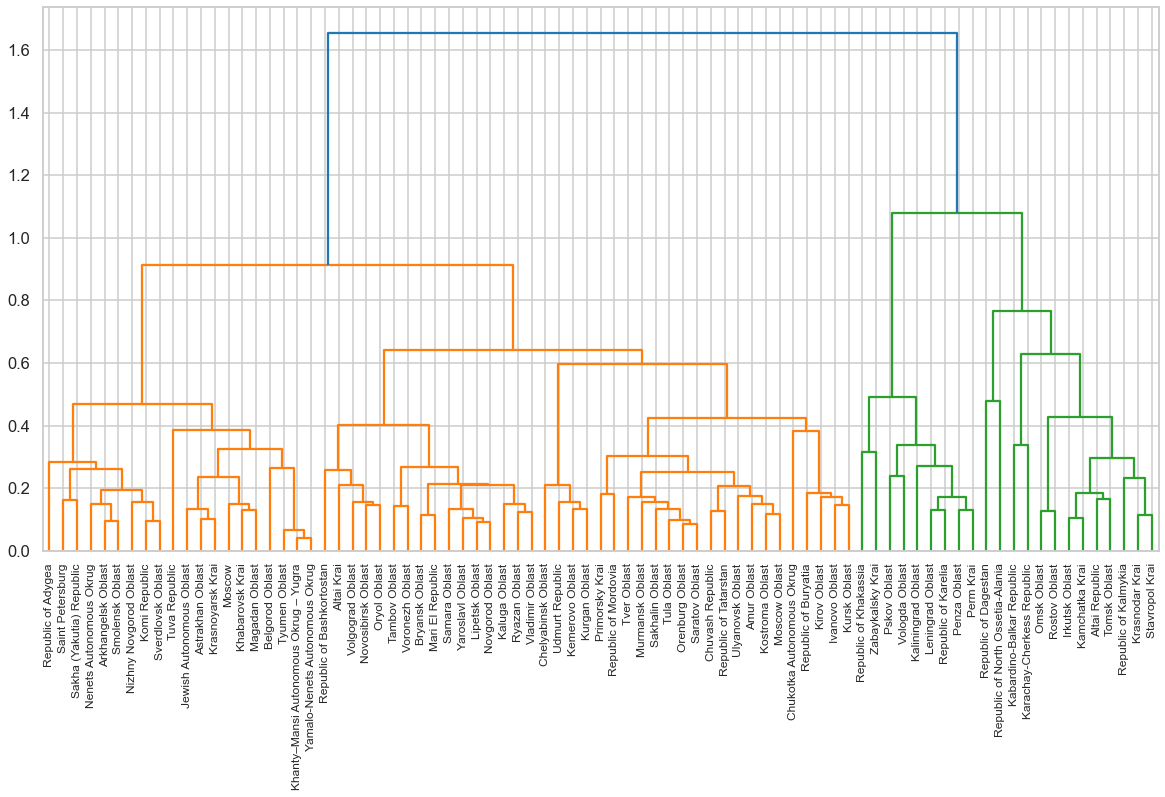

In [22]:
df_melt = pd.melt(df, id_vars=['region', 'year'], value_vars=['wine'])
df_pivot = pd.pivot_table(df_melt, index=['region'], columns=['year', 'variable'], values=['value'])

samples = df_pivot.values
region_name = df_pivot.index

samples = normalize(samples) # normalize data

mergings = linkage(samples, method='ward') # hierarchical clustering algorithm
plt.figure(figsize=(20, 10))
# graphical interpretation of clusters:
dendrogram(mergings,
        labels=region_name,
        leaf_rotation=90,
        leaf_font_size=12)
plt.show()

#### This time yellow color shows us regions close to wine sales in Saint Petersburg. This group is bigger so we select only closest.

In [23]:
labels = fcluster(mergings, 0.6, criterion='distance')

pairs = pd.DataFrame({'labels': labels, 'regions': region_name})

cluster = pairs[pairs['labels']==pairs[pairs['regions']=='Saint Petersburg']['labels'].values[0]]
regions4 = set(list(cluster['regions']))
regions4

{'Arkhangelsk Oblast',
 'Astrakhan Oblast',
 'Belgorod Oblast',
 'Jewish Autonomous Oblast',
 'Khabarovsk Krai',
 'Khanty–Mansi Autonomous Okrug – Yugra',
 'Komi Republic',
 'Krasnoyarsk Krai',
 'Magadan Oblast',
 'Moscow',
 'Nenets Autonomous Okrug',
 'Nizhny Novgorod Oblast',
 'Republic of Adygea',
 'Saint Petersburg',
 'Sakha (Yakutia) Republic',
 'Smolensk Oblast',
 'Sverdlovsk Oblast',
 'Tuva Republic',
 'Tyumen Oblast',
 'Yamalo-Nenets Autonomous Okrug'}

#### To find best fitted regions I will take common part of sets. 

In [24]:
print('Common regions with set from clusters only with wine data and previously found regions:')
regions4.intersection((regions1 | regions2 | regions3))

Common regions with set from clusters only with wine data and previously found regions:


{'Arkhangelsk Oblast',
 'Astrakhan Oblast',
 'Khanty–Mansi Autonomous Okrug – Yugra',
 'Krasnoyarsk Krai',
 'Moscow',
 'Saint Petersburg',
 'Smolensk Oblast',
 'Sverdlovsk Oblast',
 'Tyumen Oblast',
 'Yamalo-Nenets Autonomous Okrug'}

In [25]:
print('Common regions with set from clusters with all data and previously found regions (from analysis):')
regions3.intersection((regions1 | regions2))

Common regions with set from clusters with all data and previously found regions (from analysis):


{'Chelyabinsk Oblast',
 'Kaliningrad Oblast',
 'Kaluga Oblast',
 'Leningrad Oblast',
 'Saint Petersburg',
 'Tyumen Oblast'}

#### Both subsets gives 13 regions for recommendations.

In [26]:
regions_recommend = list(regions4.intersection((regions1 | regions2 | regions3)) |  regions3.intersection((regions1 | regions2)))
regions_recommend.remove('Saint Petersburg')
regions_recommend

['Astrakhan Oblast',
 'Arkhangelsk Oblast',
 'Khanty–Mansi Autonomous Okrug – Yugra',
 'Tyumen Oblast',
 'Smolensk Oblast',
 'Yamalo-Nenets Autonomous Okrug',
 'Moscow',
 'Chelyabinsk Oblast',
 'Leningrad Oblast',
 'Kaliningrad Oblast',
 'Krasnoyarsk Krai',
 'Sverdlovsk Oblast',
 'Kaluga Oblast']

#### Since we want only 10 I will pick them from those that have the smallest spread comparing to wine sales in Saint Petersburg.

In [33]:
df_spread = pd.DataFrame()
for reg in regions_recommend:
    df_spread[reg] = (df_pivot.T['Saint Petersburg'] - df_pivot.T[reg]).abs()
regions_recommend = list(df_spread.mean(axis=0).sort_values().head(10).index)
print('Final recommendation of 10 regions')
regions_recommend

Final recommendation of 10 regions


['Sverdlovsk Oblast',
 'Smolensk Oblast',
 'Leningrad Oblast',
 'Tyumen Oblast',
 'Moscow',
 'Khanty–Mansi Autonomous Okrug – Yugra',
 'Kaluga Oblast',
 'Yamalo-Nenets Autonomous Okrug',
 'Kaliningrad Oblast',
 'Chelyabinsk Oblast']

### 10 recommended regions:

- Sverdlovsk Oblast
- Smolensk Oblast
- Leningrad Oblast
- Tyumen Oblast
- Moscow
- Khanty–Mansi Autonomous Okrug – Yugra
- Kaluga Oblast
- Yamalo-Nenets Autonomous Okrug
- Kaliningrad Oblast
- Chelyabinsk Oblast

In [35]:
df_melt = pd.melt(df, id_vars=['region', 'year'], value_vars=alcohols)

def compare_plot(region):
    regions = ['Saint Petersburg', region]
    df_compare = df_melt[df_melt['region'].isin(regions)]
    df_compare.rename(columns={'variable':'drink'}, inplace=True)
    g = sns.catplot(x='year', y='value', hue='region', col='drink', col_wrap=3, data=df_compare, kind='point', height=4, aspect=1.5, sharey=False, legend=False, hue_order=regions);
    g.set_xticklabels(rotation=90);
    g.set_ylabels('liters per capita');
    plt.suptitle('Comparison of sales between Saint Petersburg and {}'.format(regions[1]), y=1.05);
    plt.legend(loc='lower right', bbox_to_anchor=(2, 0.5));

### Here is 10 regions sales compared to sales in Saint Petersburg.

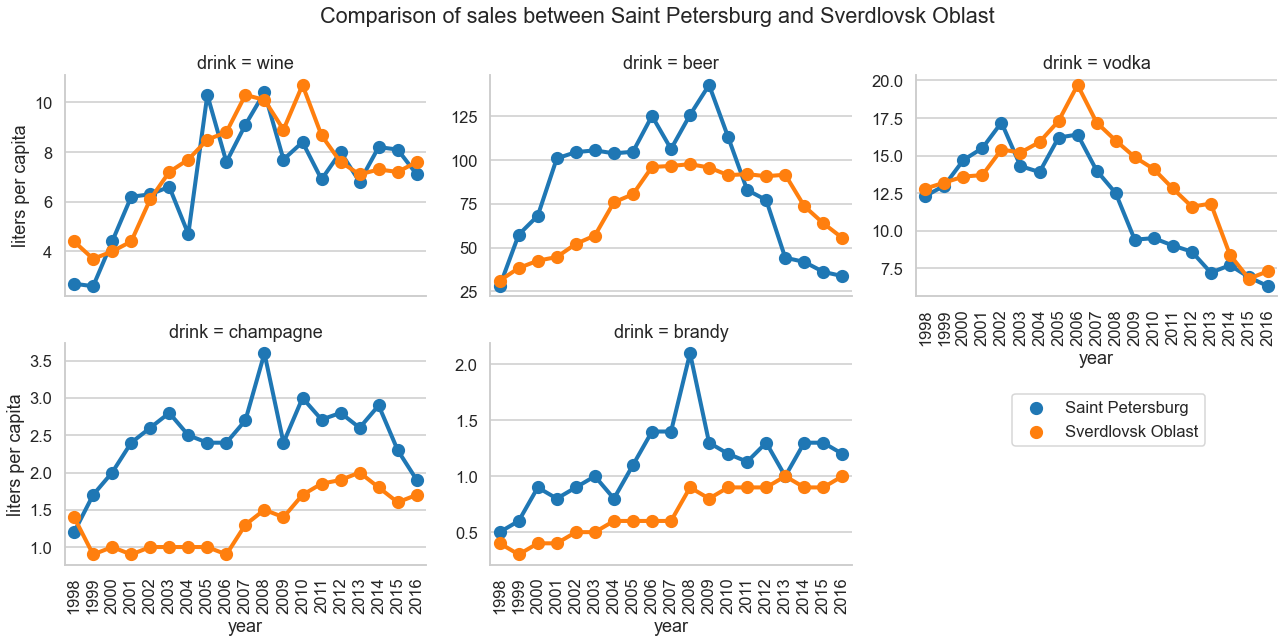

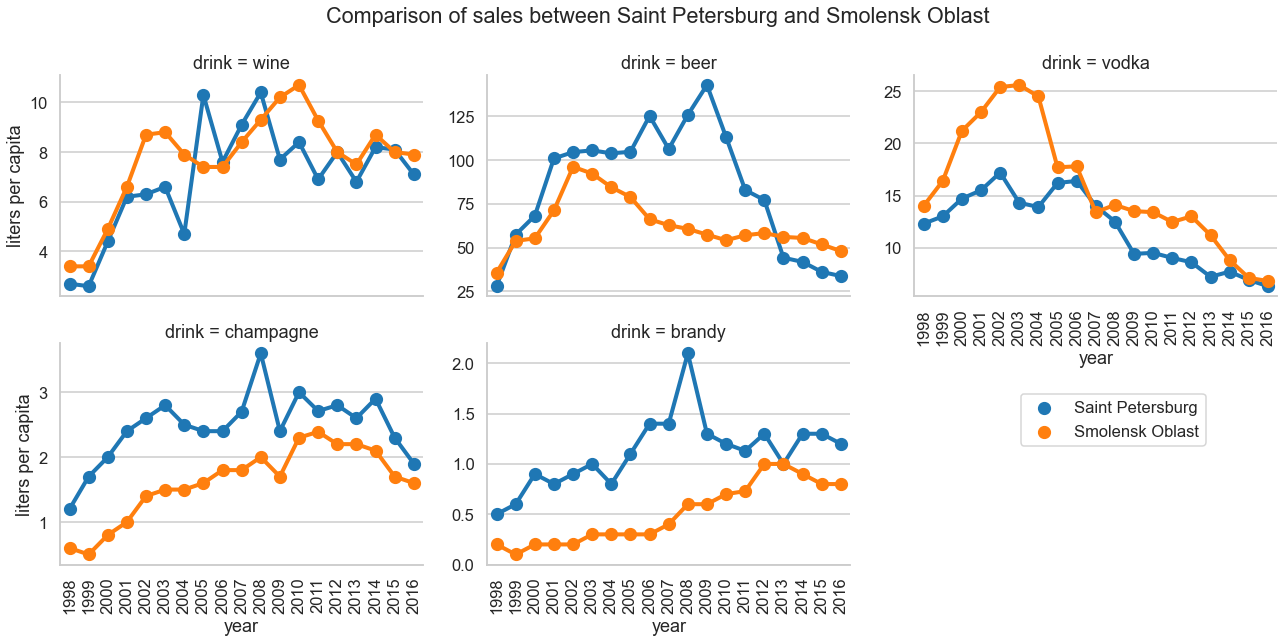

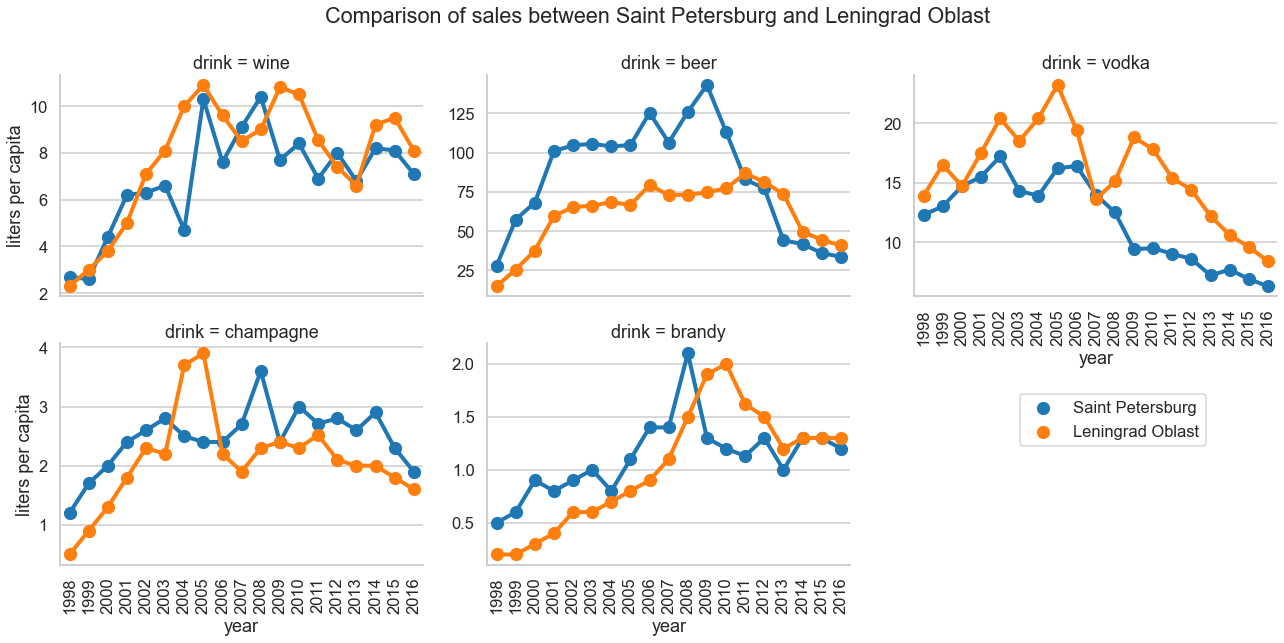

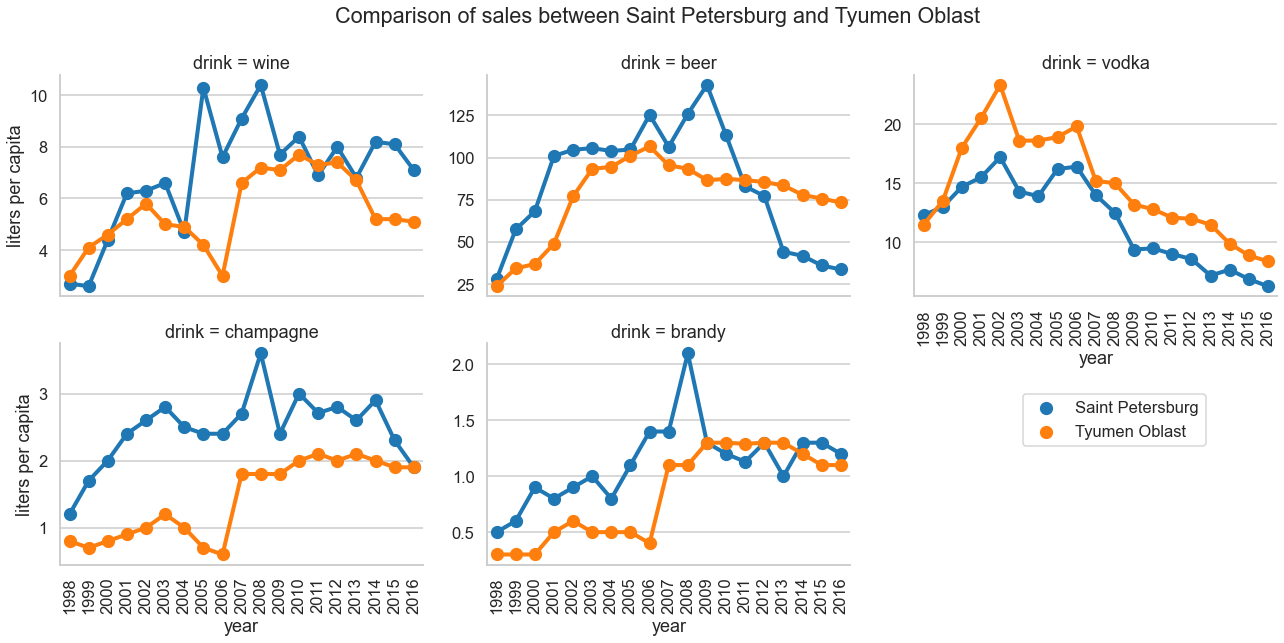

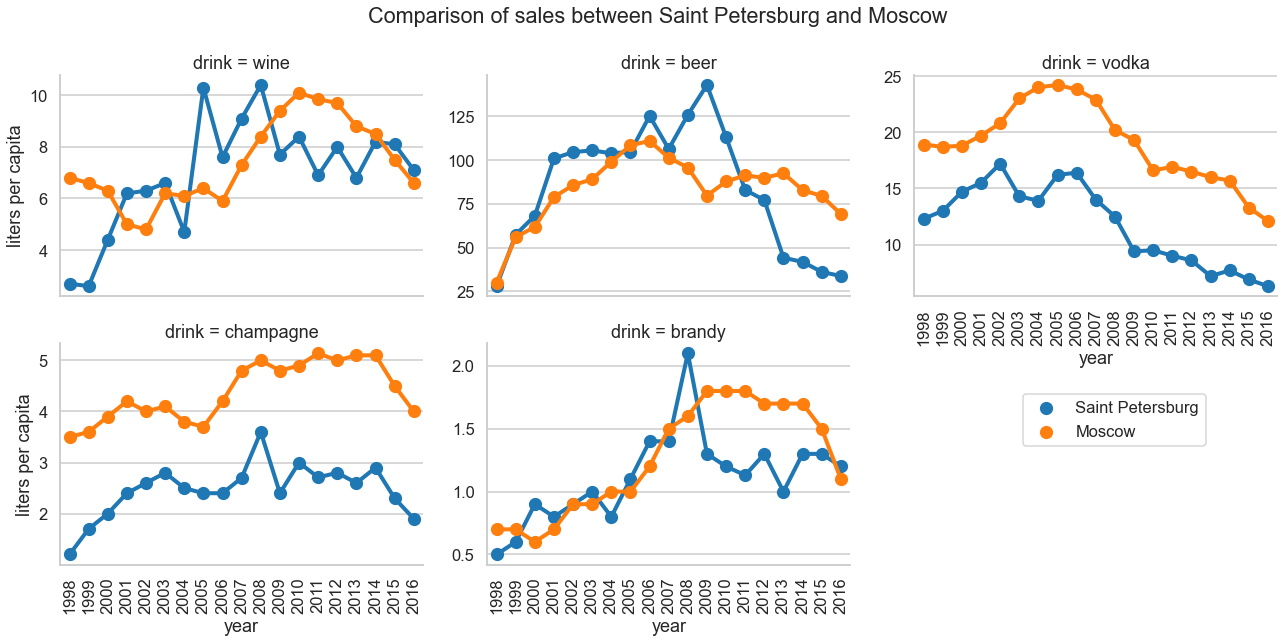

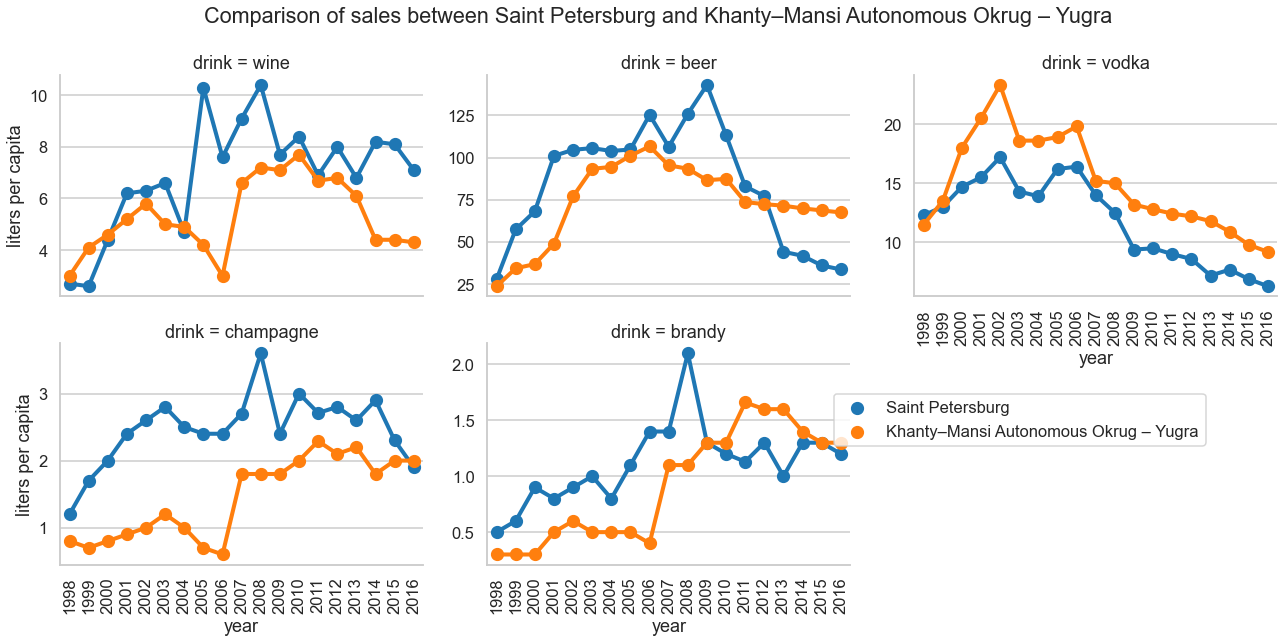

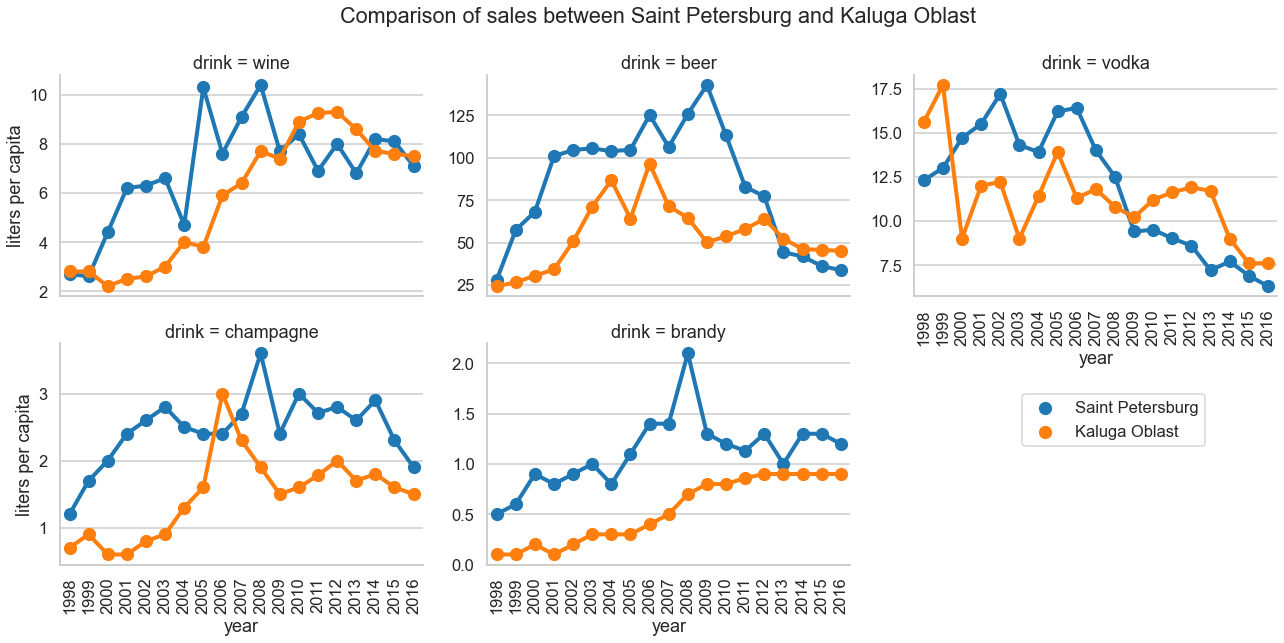

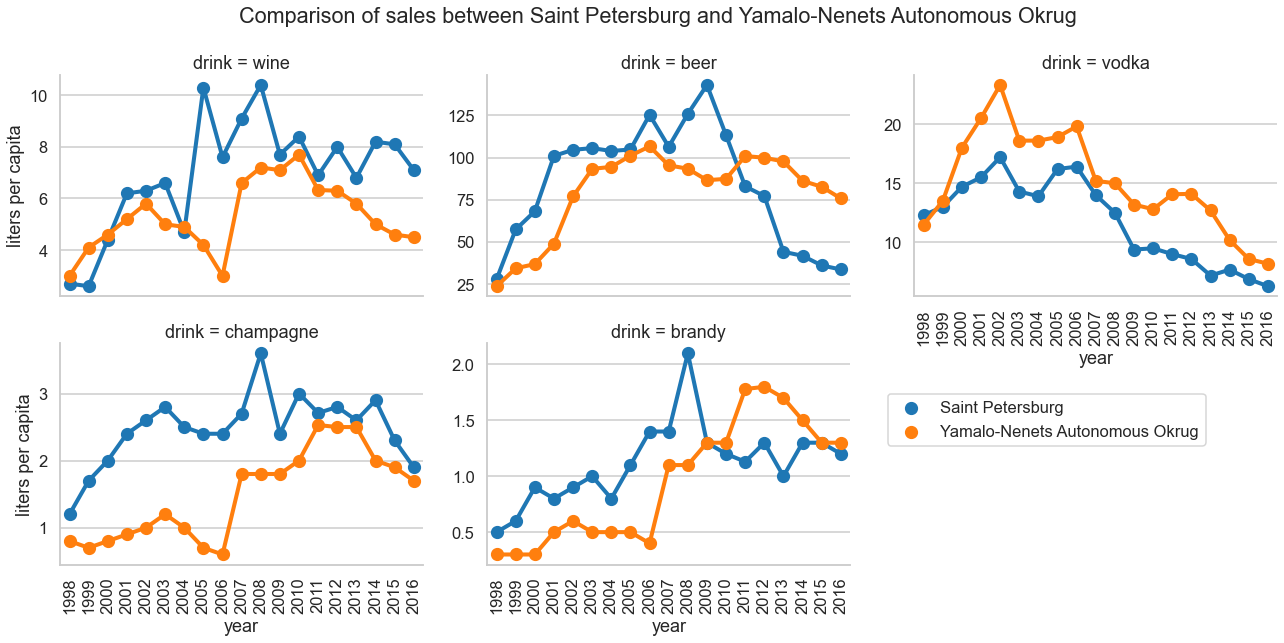

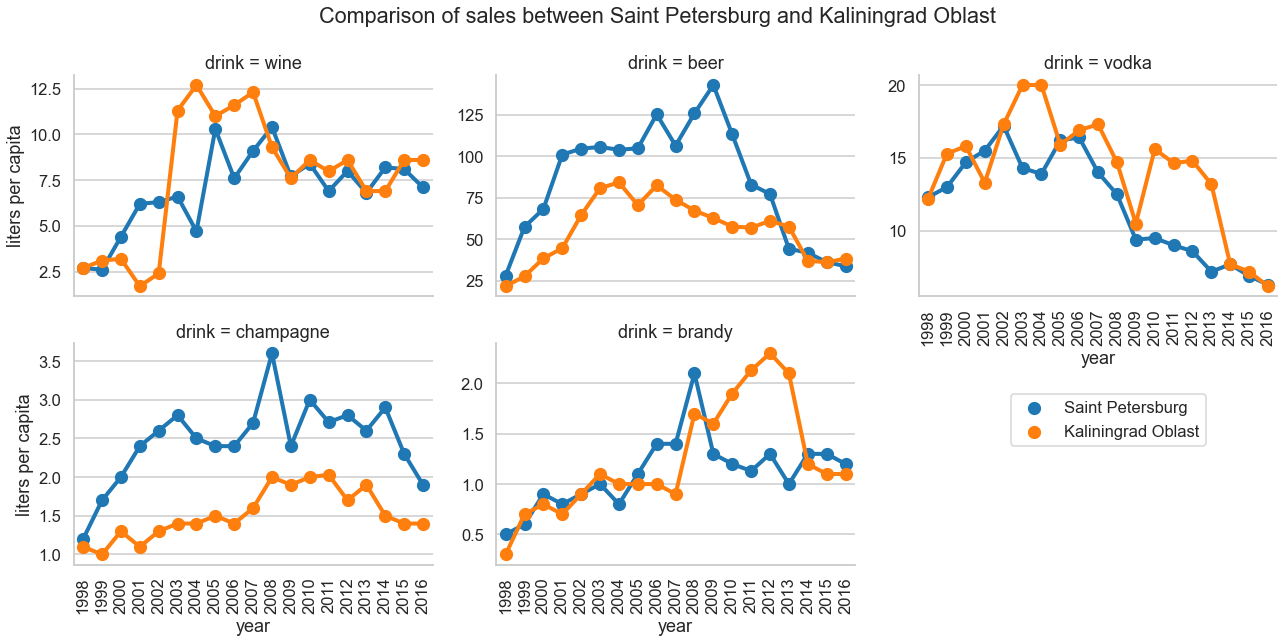

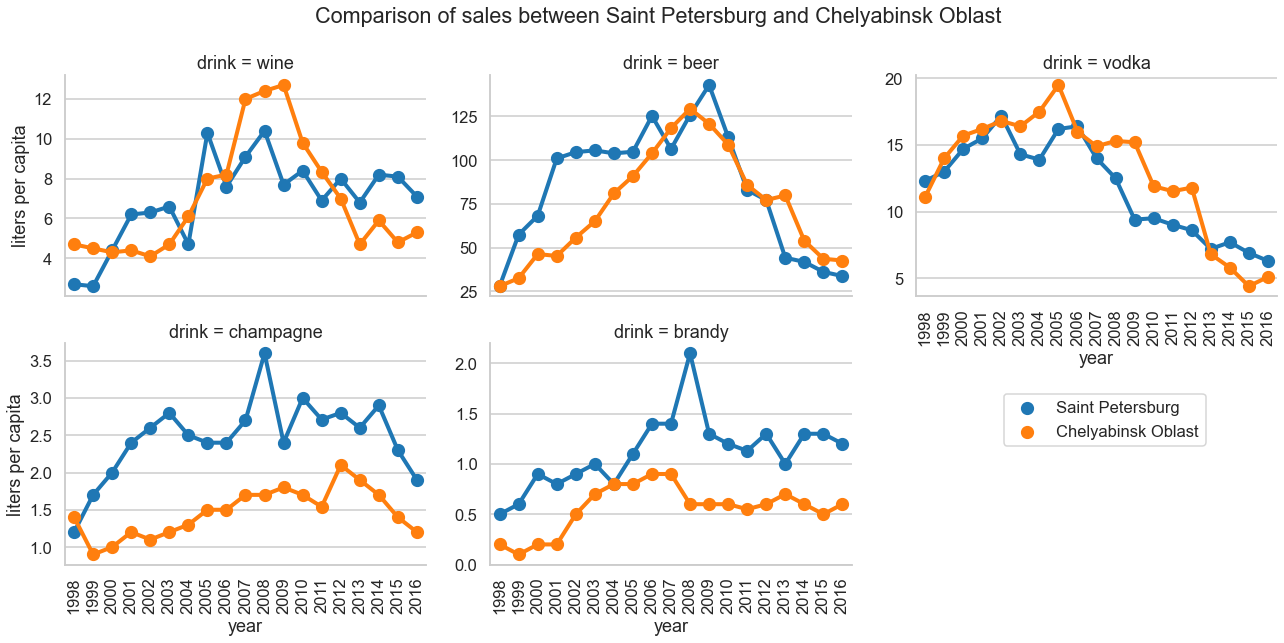

In [36]:
for region in regions_recommend:
    compare_plot(region)